In [1]:
# Library import

import numpy as np

import pyclustering
from pyclustering.cluster import xmeans

In [2]:
# Load text data

text = []
with open('./data/fasttext/sample.txt') as f:
    for line in f:
        s = line.split()
        text += [s]
text

[['An',
  'apple',
  'is',
  'a',
  'sweet',
  ',',
  'edible',
  'fruit',
  'produced',
  'by',
  'an',
  'apple',
  'tree',
  '(Malus',
  'pumila)',
  '.'],
 ['Apple',
  'trees',
  'are',
  'cultivated',
  'worldwide',
  ',',
  'and',
  'are',
  'the',
  'most',
  'widely',
  'grown',
  'species',
  'in',
  'the',
  'genus',
  'Malus',
  '.'],
 ['The',
  'tree',
  'originated',
  'in',
  'Central',
  'Asia',
  ',',
  'where',
  'its',
  'wild',
  'ancestor',
  ',',
  'Malus',
  'sieversii',
  ',',
  'is',
  'still',
  'found',
  'today',
  '.'],
 ['Apples',
  'have',
  'been',
  'grown',
  'for',
  'thousands',
  'of',
  'years',
  'in',
  'Asia',
  'and',
  'Europe',
  ',',
  'and',
  'were',
  'brought',
  'to',
  'North',
  'America',
  'by',
  'European',
  'colonists',
  '.'],
 ['Apples',
  'have',
  'religious',
  'and',
  'mythological',
  'significance',
  'in',
  'many',
  'cultures',
  ',',
  'including',
  'Norse',
  ',',
  'Greek',
  'and',
  'European',
  'Christian',
  

In [3]:
# Make word vectors

from gensim.models import Word2Vec

model = Word2Vec(text, size=5, window=5, min_count=1, workers=4)
vectors = model.wv.vectors
vectors

array([[-0.01711949,  0.07489653, -0.05835332, -0.099897  , -0.08528823],
       [ 0.0477927 ,  0.02758234,  0.04874822,  0.00806611,  0.0136364 ],
       [-0.05895277,  0.03172396, -0.00059096,  0.03532288,  0.05875742],
       [ 0.04339839,  0.04448704, -0.09681416, -0.01550732, -0.08463114],
       [ 0.05143545,  0.01172903,  0.0626467 , -0.04520991,  0.06853574],
       [ 0.01085838, -0.04457788, -0.07937767, -0.05107992, -0.04946578],
       [-0.0671498 ,  0.0139758 ,  0.00415051,  0.02835641, -0.08958555],
       [ 0.06678145, -0.08511549, -0.10004134, -0.08771866,  0.06619028],
       [-0.07103426,  0.02832867,  0.05878232,  0.02717729, -0.03848676],
       [-0.09783264, -0.0315946 ,  0.04009486, -0.00261822, -0.06544147],
       [ 0.09752329,  0.06466954, -0.02388539,  0.07206538, -0.01336041],
       [-0.00772263,  0.06461364,  0.03263163, -0.06188667,  0.06265763],
       [-0.02838385,  0.09001551, -0.01934474, -0.01915238,  0.10005417],
       [-0.01958134, -0.08386958, -0.0

In [4]:
# Clustering by x-means

init_cluster = xmeans.kmeans_plusplus_initializer(vectors, 2).initialize()
init_cluster

[array([ 0.06481839, -0.02295842, -0.07748941,  0.05879122, -0.05975301],
       dtype=float32),
 array([-0.02215327,  0.00352508,  0.07685962, -0.02943869,  0.04994995],
       dtype=float32)]

In [5]:
# ccore is not supported on MacOS
xm = xmeans.xmeans(vectors, init_cluster, ccore=False)
xm.process()

clusters = xm.get_clusters()
len(clusters)

<type_encoding.CLUSTER_INDEX_LIST_SEPARATION: 1>

In [6]:
# Dimension reduction by TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
XY = tsne.fit_transform(vectors)
xs, ys = XY[:, 0], XY[:, 1]

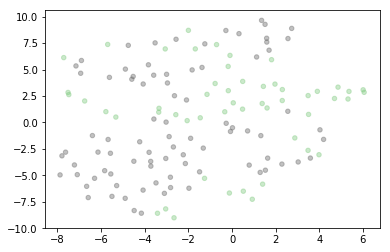

In [7]:
# Visualizing with matplotlib

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from operator import itemgetter

_xs = np.array([])
_ys = np.array([])
_cs = np.array([])

for i, cluster in enumerate(clusters):
    getter = itemgetter(*cluster)
    
    _xs = np.append(_xs, getter(xs))
    _ys = np.append(_ys, getter(ys))
    _cs = np.append(_cs, np.array([i]*len(cluster)))

plt.scatter(_xs, _ys, s=20, alpha=0.4, c=_cs, cmap=cm.Accent)